In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len =500

In [11]:
print('Loading data...')
(x_train, y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
print(len(x_train),'train sequence')
print(len(x_test),'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:',x_test.shape)

Loading data...
25000 train sequence
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [12]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv1D
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len,
                       input_shape=(max_len,), name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
             loss = 'binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [13]:
import matplotlib.pyplot as plt

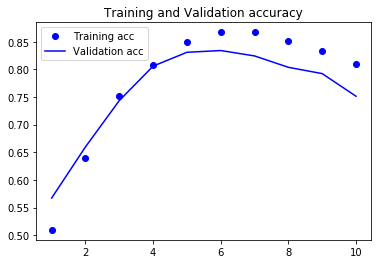

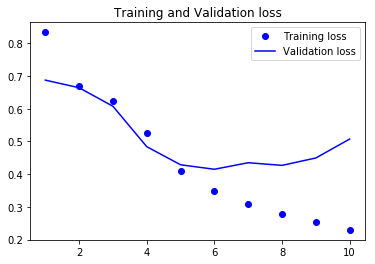

In [14]:
acc = history.history['acc']
val_acc= history.history['val_acc']
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()